<a href="https://colab.research.google.com/github/dharshini2284/Sentiment_Analysis/blob/main/SentimentAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing the libraries

In [ ]:
##IMPORTING THE LIBRARIES
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
from wordcloud import WordCloud
from wordcloud import STOPWORDS

Reading the csv file from google drive

In [ ]:
#MOUNTING THE DRIVE
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#READING THE CSV FILE
DF = pd.read_csv('/content/drive/MyDrive/Machine Learning Package/Sentiment Analysis.csv')
DF

uniqueID            drugName                              condition  \
0          1000               Mobic                         Osteoarthritis   
1           111           Meloxicam                         Osteoarthritis   
2            11           Orthovisc                         Osteoarthritis   
3           111          Infliximab                    Psoriatic Arthritis   
4           110            Euflexxa                         Osteoarthritis   
...         ...                 ...                                    ...   
25840       100           Westhroid  Hypothyroidism, After Thyroid Removal   
25841        11       Levothyroxine  Hypothyroidism, After Thyroid Removal   
25842      1100       Nature-Throid  Hypothyroidism, After Thyroid Removal   
25843       100  Thyroid desiccated  Hypothyroidism, After Thyroid Removal   
25844         1           Synthroid  Hypothyroidism, After Thyroid Removal   

                                                  review  Sentiment  \
0      "Reduced my pain by 1% and lets me live a norm...          0   
1      "I have been using Mobic to relieve the pain f...          0   
2      "This is my third round of orthovisc. My great...          1   
3      "I have severe psoriatic arthritis and I&#001;...          0   
4      "After 0 years of astounding results from Supa...          0   
...                                                  ...        ...   
25840  "I&#001;ve been on a combination of Westhroid ...          1   
25841  "I&#001;ve been on this medicine for more than...          0   
25842  "Great med if you can get it.  The back order ...          0   
25843  "Great med if you can get it.  The back order ...          0   
25844  "I had my thyroid removed in February 0001 and...          1   

       Unnamed: 5  Unnamed: 6  Unnamed: 7  Unnamed: 8  Unnamed: 9  
0             NaN         NaN         NaN         NaN         NaN  
1             NaN         NaN         NaN         NaN         NaN  
2             NaN         NaN         NaN         NaN         NaN  
3             NaN         NaN         NaN         NaN         NaN  
4             NaN         NaN         NaN         NaN         NaN  
...           ...         ...         ...         ...         ...  
25840         NaN         NaN         NaN         NaN         NaN  
25841         NaN         NaN         NaN         NaN         NaN  
25842         NaN         NaN         NaN         NaN         NaN  
25843         NaN         NaN         NaN         NaN         NaN  
25844         NaN         NaN         NaN         NaN         NaN  

[25845 rows x 10 columns]

Data preprocessing

In [ ]:
# Check for missing values
missing_values = DF.isnull().sum()
print(missing_values)

uniqueID          0
drugName          0
condition         0
review            0
Sentiment         0
Unnamed: 5    25845
Unnamed: 6    25845
Unnamed: 7    25845
Unnamed: 8    25845
Unnamed: 9    25845
dtype: int64


In [ ]:
#AS THE LAST FIVE COLUMNS ARE NULL WE ARE DROPPING THE LAST FIVE COLUMNS
DF=DF.iloc[:,:-5]
DF


uniqueID            drugName                              condition  \
0          1000               Mobic                         Osteoarthritis   
1           111           Meloxicam                         Osteoarthritis   
2            11           Orthovisc                         Osteoarthritis   
3           111          Infliximab                    Psoriatic Arthritis   
4           110            Euflexxa                         Osteoarthritis   
...         ...                 ...                                    ...   
25840       100           Westhroid  Hypothyroidism, After Thyroid Removal   
25841        11       Levothyroxine  Hypothyroidism, After Thyroid Removal   
25842      1100       Nature-Throid  Hypothyroidism, After Thyroid Removal   
25843       100  Thyroid desiccated  Hypothyroidism, After Thyroid Removal   
25844         1           Synthroid  Hypothyroidism, After Thyroid Removal   

                                                  review  Sentiment  
0      "Reduced my pain by 1% and lets me live a norm...          0  
1      "I have been using Mobic to relieve the pain f...          0  
2      "This is my third round of orthovisc. My great...          1  
3      "I have severe psoriatic arthritis and I&#001;...          0  
4      "After 0 years of astounding results from Supa...          0  
...                                                  ...        ...  
25840  "I&#001;ve been on a combination of Westhroid ...          1  
25841  "I&#001;ve been on this medicine for more than...          0  
25842  "Great med if you can get it.  The back order ...          0  
25843  "Great med if you can get it.  The back order ...          0  
25844  "I had my thyroid removed in February 0001 and...          1  

[25845 rows x 5 columns]

In [ ]:
#DESCRIBING THE DATA
print(DF.describe())

           uniqueID     Sentiment
count  25845.000000  25845.000000
mean     477.394931      0.425073
std     1250.237804      0.494364
min        0.000000      0.000000
25%       11.000000      0.000000
50%      110.000000      0.000000
75%     1000.000000      1.000000
max    11111.000000      1.000000


In [ ]:
#CHECKING FOR DUPLICATES
DF.duplicated().value_counts()

False    25665
True       180
Name: count, dtype: int64

In [ ]:
#REMOVING ALL THE DUPLICATES
DF = DF.drop_duplicates()
DF.duplicated().value_counts()

False    25665
Name: count, dtype: int64

Preprocessing using NLTK

In [ ]:
#IMPORTING THE NLTK PACKAGE
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.sentiment import SentimentIntensityAnalyzer

In [ ]:
#DOWLOADING THE NLTK RESOURCES
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('vader_lexicon')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

Finding sentiment score using NLTK

In [ ]:
#INITIALIZING THE SENTIMENT INTENSITY ANALYSER
sia = SentimentIntensityAnalyzer()

#FUNCTION TO APPLY SENTIMENT ANALYSIS FOR SINGLE TEXT
def analyze_sentiment(text):
    sentiment_scores = sia.polarity_scores(text)
    return sentiment_scores['compound']

#APPLYING THE SENTIMENT ANALYSIS SCORE FOR THE TEXT DATA
# Instead of directly assigning to DF['sentiment_score'], use .loc to avoid the warning.
DF.loc[:, 'sentiment_score'] = DF['review'].apply(analyze_sentiment)
#DF['sentiment_score'] = DF['review'].apply(analyze_sentiment)
DF

uniqueID        drugName                              condition  \
0          1000           Mobic                         Osteoarthritis   
1           111       Meloxicam                         Osteoarthritis   
2            11       Orthovisc                         Osteoarthritis   
3           111      Infliximab                    Psoriatic Arthritis   
4           110        Euflexxa                         Osteoarthritis   
...         ...             ...                                    ...   
25823        11  Armour Thyroid  Hypothyroidism, After Thyroid Removal   
25825         0   Levothyroxine  Hypothyroidism, After Thyroid Removal   
25829       111          Forteo                     Hypoparathyroidism   
25834         1   Levothyroxine  Hypothyroidism, After Thyroid Removal   
25836        10   Levothyroxine  Hypothyroidism, After Thyroid Removal   

                                                  review  Sentiment  \
0      "Reduced my pain by 1% and lets me live a norm...          0   
1      "I have been using Mobic to relieve the pain f...          0   
2      "This is my third round of orthovisc. My great...          1   
3      "I have severe psoriatic arthritis and I&#001;...          0   
4      "After 0 years of astounding results from Supa...          0   
...                                                  ...        ...   
25823  "Complete Thyroidectemy for cancer and two HUG...          0   
25825  "I have used Levothroid and Synthroid.  I am c...          1   
25829  "I have been on Forteo 0 months now, I started...          0   
25834  "My thyroid disease was caught by my determina...          0   
25836  "Got my thyroid out in November due to cancer....          0   

       sentiment_score  
0              -0.5562  
1               0.2732  
2               0.4772  
3               0.4471  
4              -0.4803  
...                ...  
25823          -0.9927  
25825          -0.9390  
25829           0.5423  
25834           0.2537  
25836          -0.9300  

[25665 rows x 6 columns]

In [ ]:
def predict_class(score):
  if score < 0:
    return 0;
  else:
    return 1;
# Use .loc to avoid the SettingWithCopyWarning
DF.loc[:, 'Predicted_sentiment_score'] = DF['sentiment_score'].apply(predict_class)

#DF['Predicted_sentiment_score'] = DF['sentiment_score'].apply(predict_class)
#COUNTING THE NUMBER OF MISMATCHES
count=0
for index,row in DF.iterrows():
  if row['Predicted_sentiment_score']!=row['Sentiment']:
    count+=1
print("The percentage of predicted value that is wrong ",count*100/len(DF))


The percentage of predicted value that is wrong  45.563997662185855


NLTK preprocessing to make the data fit for modelling

In [ ]:
#DEFINING FUCNTIONS TO PERFORM THE NLTK PREPROCESSING STEPS

#1.USED TO TOKENIZE THE TEXT DATA                                               - EX : I AM ASH =>['I','AM','ASH']
def tokenize_text(text):
    tokens = word_tokenize(text)
    return tokens
#Tokenization is the process of splitting a text into individual words or units.

#2.USED TO REMOVE COMMON ENGLISH STOPWORDS FROM TOKENISED DATA
def remove_stopwords(tokens):
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [word for word in tokens if word.lower() not in stop_words]
    return filtered_tokens
#Stopwords are words that are considered to be of little value in text analysis because they are very common and don't carry much meaningful information (e.g., "the," "and," "in").
#We use the NLTK library's list of English stopwords to identify and remove them from the list of tokens.

# 3.USED TO NORMALIZE THE TOKEN                                                 - EX : ["loving", "cats"]  => ["love", "cat"]
def lemmatize_text(tokens):
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(word) for word in tokens]
    return lemmatized_tokens
#Lemmatization is the process of reducing words to their base or root form. It aims to normalize words so that different inflections or forms of the same word are represented by a common base form.
#It uses the WordNetLemmatizer from the NLTK library to perform lemmatization.

#4.MAIN FUNCTION TO PERFORM ALL NLTK PREPROCESSING
def preprocess_text(text):
    tokens = tokenize_text(text)
    tokens = remove_stopwords(tokens)
    tokens = lemmatize_text(tokens)
    return ' '.join(tokens)  # Join the tokens back into a single string

#5.SIMILAR TO LEMATIZATION
def stem_text(tokens):
    stemmer = PorterStemmer()
    stemmed_tokens = [stemmer.stem(word) for word in tokens]
    return stemmed_tokens

In [ ]:
#CALLING THE preprocess_text FUNCTION
# Use .loc to modify the DataFrame safely
DF.loc[:, 'review'] = DF['review'].apply(preprocess_text)

#DF['review'] = DF['review'].apply(preprocess_text)

In [ ]:
#STORING THE PREPROCESSED DATA INTO A SEPERATE CSV FILE
DF.to_csv('Preprocessed_DataFrame.csv',index=False)
DF2=pd.read_csv('/content/Preprocessed_DataFrame.csv')
DF2

uniqueID        drugName                              condition  \
0          1000           Mobic                         Osteoarthritis   
1           111       Meloxicam                         Osteoarthritis   
2            11       Orthovisc                         Osteoarthritis   
3           111      Infliximab                    Psoriatic Arthritis   
4           110        Euflexxa                         Osteoarthritis   
...         ...             ...                                    ...   
25660        11  Armour Thyroid  Hypothyroidism, After Thyroid Removal   
25661         0   Levothyroxine  Hypothyroidism, After Thyroid Removal   
25662       111          Forteo                     Hypoparathyroidism   
25663         1   Levothyroxine  Hypothyroidism, After Thyroid Removal   
25664        10   Levothyroxine  Hypothyroidism, After Thyroid Removal   

                                                  review  Sentiment  \
0          `` Reduced pain 1 % let live normal life ! ''          0   
1      `` using Mobic relieve pain Spinal Fusion Marc...          0   
2      `` third round orthovisc . great fear pain inj...          1   
3      `` severe psoriatic arthritis & # 001 ; since ...          0   
4      `` 0 year astounding result Supartz , miss inj...          0   
...                                                  ...        ...   
25660  `` Complete Thyroidectemy cancer two HUGE goit...          0   
25661  `` used Levothroid Synthroid . currently Levot...          1   
25662  `` Forteo 0 month , started taking thyroid sur...          0   
25663  `` thyroid disease caught determination find r...          0   
25664  `` Got thyroid November due cancer . Started t...          0   

       sentiment_score  Predicted_sentiment_score  
0              -0.5562                          0  
1               0.2732                          1  
2               0.4772                          1  
3               0.4471                          1  
4              -0.4803                          0  
...                ...                        ...  
25660          -0.9927                          0  
25661          -0.9390                          0  
25662           0.5423                          1  
25663           0.2537                          1  
25664          -0.9300                          0  

[25665 rows x 7 columns]

Bag of Words(BoW)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
# Create a CountVectorizer instance
vectorizer = CountVectorizer()

#FIT AND TRANFORM THE PREPROCESSED DATA
bow_matrix = vectorizer.fit_transform(DF['review'])
#The result is a sparse matrix where each row corresponds to a document (review), and each column corresponds to a unique word in your dataset.

bow_array = bow_matrix.toarray()
# The vocabulary (unique words) can be accessed as follows:
vocabulary = vectorizer.get_feature_names_out()
bow_df = pd.DataFrame(bow_array, columns=vocabulary)
bow_df

00  000  0000  00000  0000g  0000ish  0000mcg  0000mg  0000mgs  0000x  \
0       0    0     0      0      0        0        0       0        0      0   
1       0    0     1      0      0        0        0       0        0      0   
2       0    0     0      0      0        0        0       0        0      0   
3       1    0     0      0      0        0        0       0        0      0   
4       1    0     0      0      0        0        0       0        0      0   
...    ..  ...   ...    ...    ...      ...      ...     ...      ...    ...   
25660   0    0     0      0      0        0        0       0        0      0   
25661   1    0     0      0      0        0        0       0        0      0   
25662   0    0     0      0      0        0        0       0        0      0   
25663   0    0     3      0      0        0        0       0        0      0   
25664   0    0     0      0      0        0        0       0        0      0   

       ...  zuchiinni  zumba  zyban  zydis  zydus  zypexa  zyprexa  zyprexia  \
0      ...          0      0      0      0      0       0        0         0   
1      ...          0      0      0      0      0       0        0         0   
2      ...          0      0      0      0      0       0        0         0   
3      ...          0      0      0      0      0       0        0         0   
4      ...          0      0      0      0      0       0        0         0   
...    ...        ...    ...    ...    ...    ...     ...      ...       ...   
25660  ...          0      0      0      0      0       0        0         0   
25661  ...          0      0      0      0      0       0        0         0   
25662  ...          0      0      0      0      0       0        0         0   
25663  ...          0      0      0      0      0       0        0         0   
25664  ...          0      0      0      0      0       0        0         0   

       zypreza  zzzquil  
0            0        0  
1            0        0  
2            0        0  
3            0        0  
4            0        0  
...        ...      ...  
25660        0        0  
25661        0        0  
25662        0        0  
25663        0        0  
25664        0        0  

[25665 rows x 16203 columns]

Calculating TF-IDF for BoW

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
# Create a TfidfVectorizer instance
tfidf_vectorizer = TfidfVectorizer()

# Fit and transform the BoW DataFrame to obtain TF-IDF values
tfidf_matrix = tfidf_vectorizer.fit_transform(bow_df)

# Convert the tfidf_matrix to a DataFrame for better visualization (optional)
import pandas as pd
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

# Print the TF-IDF DataFrame
tfidf_df

00  000  0000  00000  0000g  0000ish  0000mcg  0000mg  0000mgs  0000x  \
0      1.0  0.0   0.0    0.0    0.0      0.0      0.0     0.0      0.0    0.0   
1      0.0  1.0   0.0    0.0    0.0      0.0      0.0     0.0      0.0    0.0   
2      0.0  0.0   1.0    0.0    0.0      0.0      0.0     0.0      0.0    0.0   
3      0.0  0.0   0.0    1.0    0.0      0.0      0.0     0.0      0.0    0.0   
4      0.0  0.0   0.0    0.0    1.0      0.0      0.0     0.0      0.0    0.0   
...    ...  ...   ...    ...    ...      ...      ...     ...      ...    ...   
16198  0.0  0.0   0.0    0.0    0.0      0.0      0.0     0.0      0.0    0.0   
16199  0.0  0.0   0.0    0.0    0.0      0.0      0.0     0.0      0.0    0.0   
16200  0.0  0.0   0.0    0.0    0.0      0.0      0.0     0.0      0.0    0.0   
16201  0.0  0.0   0.0    0.0    0.0      0.0      0.0     0.0      0.0    0.0   
16202  0.0  0.0   0.0    0.0    0.0      0.0      0.0     0.0      0.0    0.0   

       ...  zuchiinni  zumba  zyban  zydis  zydus  zypexa  zyprexa  zyprexia  \
0      ...        0.0    0.0    0.0    0.0    0.0     0.0      0.0       0.0   
1      ...        0.0    0.0    0.0    0.0    0.0     0.0      0.0       0.0   
2      ...        0.0    0.0    0.0    0.0    0.0     0.0      0.0       0.0   
3      ...        0.0    0.0    0.0    0.0    0.0     0.0      0.0       0.0   
4      ...        0.0    0.0    0.0    0.0    0.0     0.0      0.0       0.0   
...    ...        ...    ...    ...    ...    ...     ...      ...       ...   
16198  ...        0.0    0.0    0.0    0.0    0.0     1.0      0.0       0.0   
16199  ...        0.0    0.0    0.0    0.0    0.0     0.0      1.0       0.0   
16200  ...        0.0    0.0    0.0    0.0    0.0     0.0      0.0       1.0   
16201  ...        0.0    0.0    0.0    0.0    0.0     0.0      0.0       0.0   
16202  ...        0.0    0.0    0.0    0.0    0.0     0.0      0.0       0.0   

       zypreza  zzzquil  
0          0.0      0.0  
1          0.0      0.0  
2          0.0      0.0  
3          0.0      0.0  
4          0.0      0.0  
...        ...      ...  
16198      0.0      0.0  
16199      0.0      0.0  
16200      0.0      0.0  
16201      1.0      0.0  
16202      0.0      1.0  

[16203 rows x 16203 columns]

Visulaization


Pie chart for positive and negative reviews

[10922, 14743]


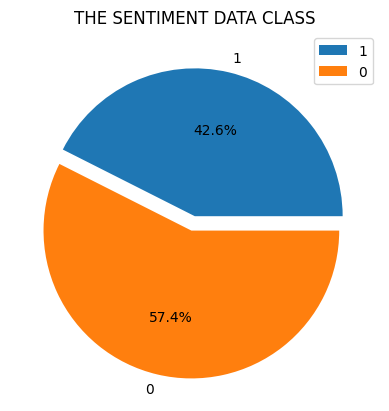

In [ ]:
#PLOTTING THE PIE CHART FOR THE COLUMN SENTIMENT
CLASS_COUNT=[]
CLASS_COUNT.append(DF['Sentiment'].value_counts()[1])
CLASS_COUNT.append(DF['Sentiment'].value_counts()[0])
print(CLASS_COUNT)

# Creating plot
fig,ax = plt.subplots()
Class=['1','0']
explode=[0,0.1]
ax.pie(CLASS_COUNT,labels=Class,explode=explode,autopct='%1.1f%%')
plt.legend(Class)
plt.title("THE SENTIMENT DATA CLASS")
plt.show()

Word cloud for drug names

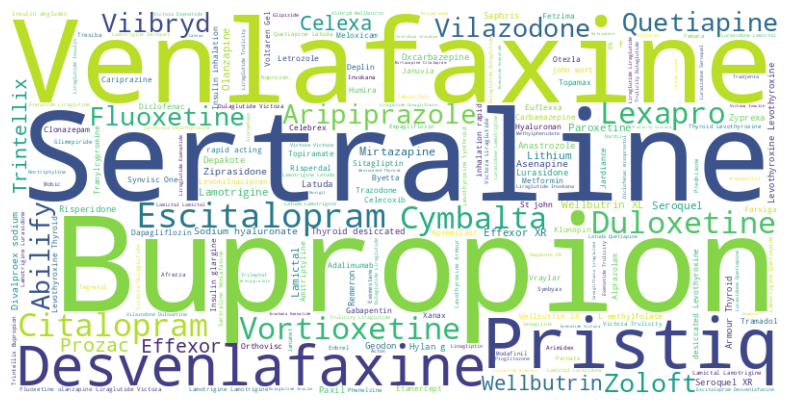

In [ ]:
#CONCATENATING ALL THE DRUG NAMES FROM THE COLUMN 'drugName' INTO A SINGLE STRING
text_data = ' '.join(DF['drugName'].astype(str))
#CREWATING WORD CLOUD OBJECT
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_data)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Hide the axis
plt.show()

Top 10 drug names

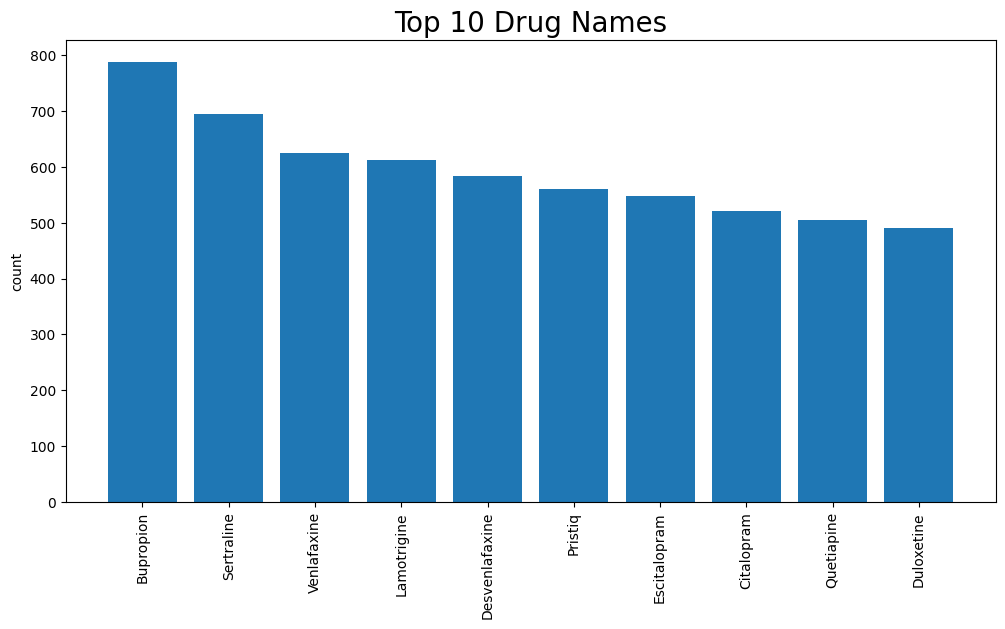

In [ ]:
plt.figure(figsize=(12,6))
conditions = DF['drugName'].value_counts(ascending = False).head(10)

plt.bar(conditions.index,conditions.values)
plt.title('Top 10 Drug Names',fontsize = 20)
plt.xticks(rotation=90)
plt.ylabel('count')
plt.show()


Bottom 10 drug names

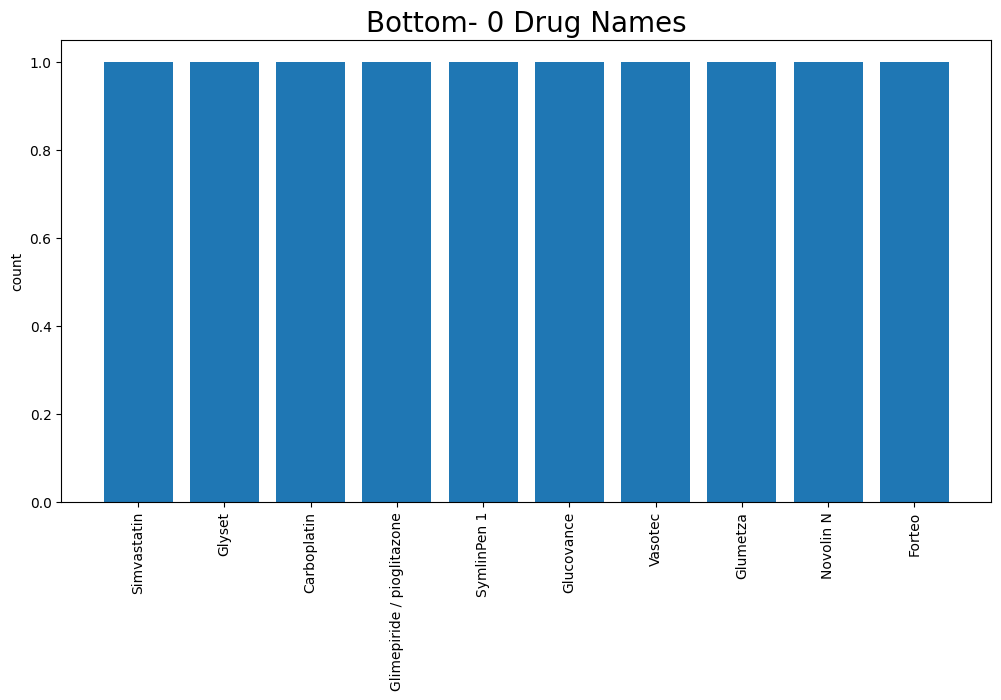

In [ ]:
plt.figure(figsize=(12,6))
conditions = DF['drugName'].value_counts(ascending = False).tail(10)

plt.bar(conditions.index,conditions.values)
plt.title('Bottom- 0 Drug Names',fontsize = 20)
plt.xticks(rotation=90)
plt.ylabel('count')
plt.show()

Word cloud for all conditions

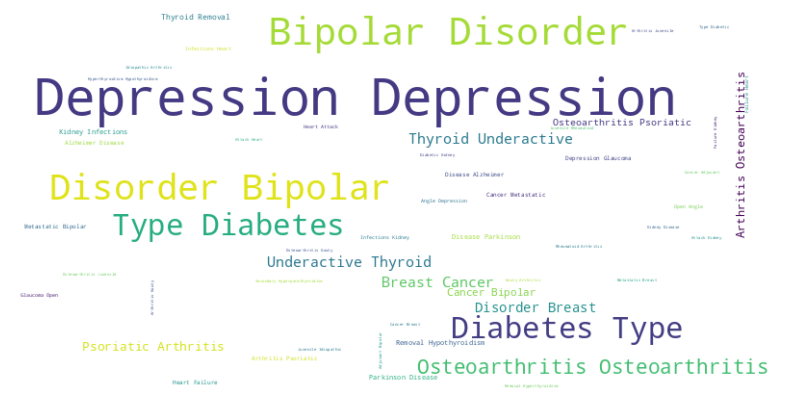

In [ ]:
#CONCATENATING ALL THE CONDITIONS FROM THE COLUMN 'condition' INTO A SINGLE STRING
text_data = ' '.join(DF['condition'].astype(str))
#CREWATING WORD CLOUD OBJECT
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_data)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Hide the axis
plt.show()

Top 5 conditions

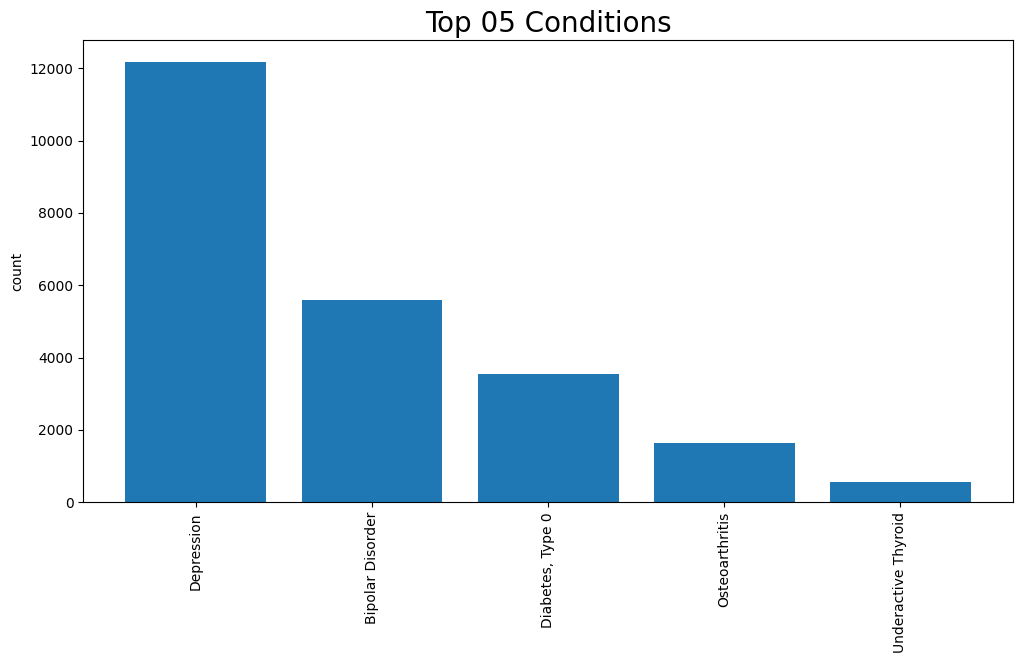

In [ ]:
plt.figure(figsize=(12,6))
conditions = DF['condition'].value_counts(ascending = False).head(5)

plt.bar(conditions.index,conditions.values)
plt.title('Top 05 Conditions',fontsize = 20)
plt.xticks(rotation=90)
plt.ylabel('count')
plt.show()

Bottom 5 conditions

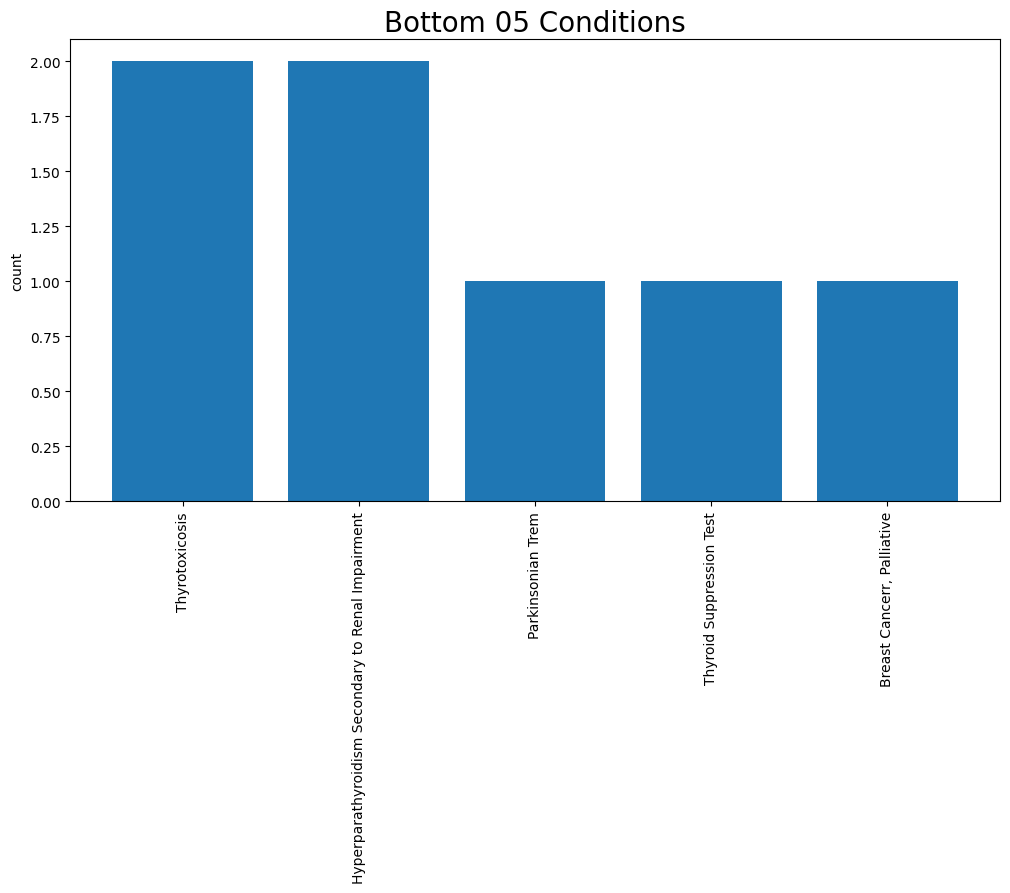

In [ ]:
plt.figure(figsize=(12,6))
conditions = DF['condition'].value_counts(ascending = False).tail(5)

plt.bar(conditions.index,conditions.values)
plt.title('Bottom 05 Conditions',fontsize = 20)
plt.xticks(rotation=90)
plt.ylabel('count')
plt.show()


Number of drugs per condition

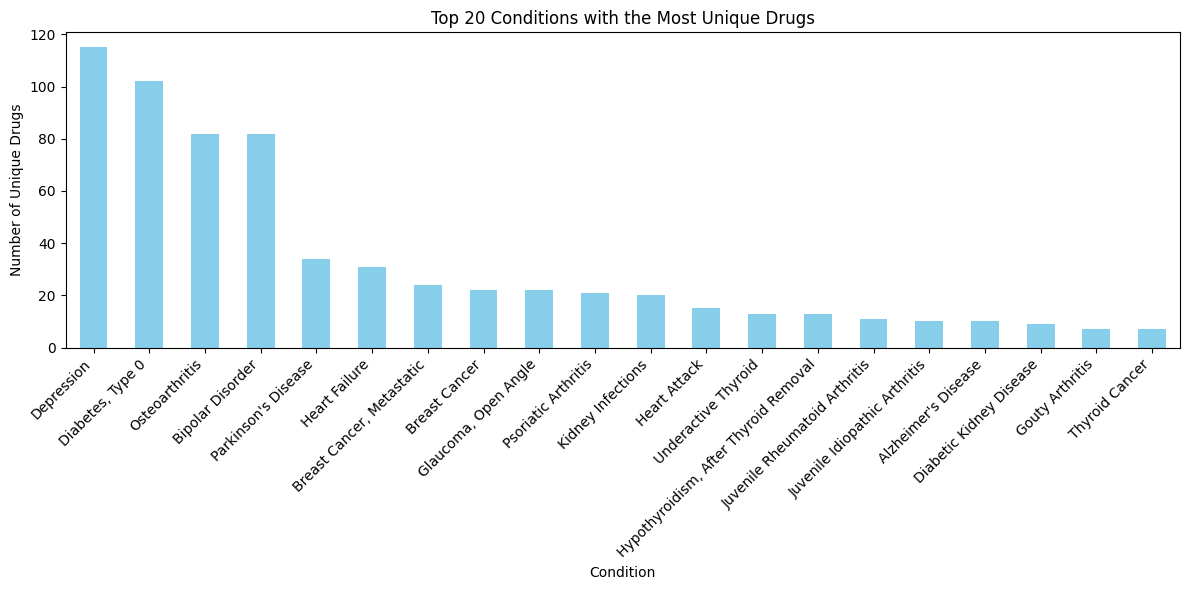

In [ ]:
#lets check the number of drugs/condition
result = DF.groupby('condition')['drugName'].nunique().sort_values(ascending=False).head(20)

# Create a bar chart
plt.figure(figsize=(12, 6))
result.plot(kind='bar', color='skyblue')
plt.title('Top 20 Conditions with the Most Unique Drugs')
plt.xlabel('Condition')
plt.ylabel('Number of Unique Drugs')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability

# Display the plot
plt.tight_layout()
plt.show()

Top 20 number of conditions per drug

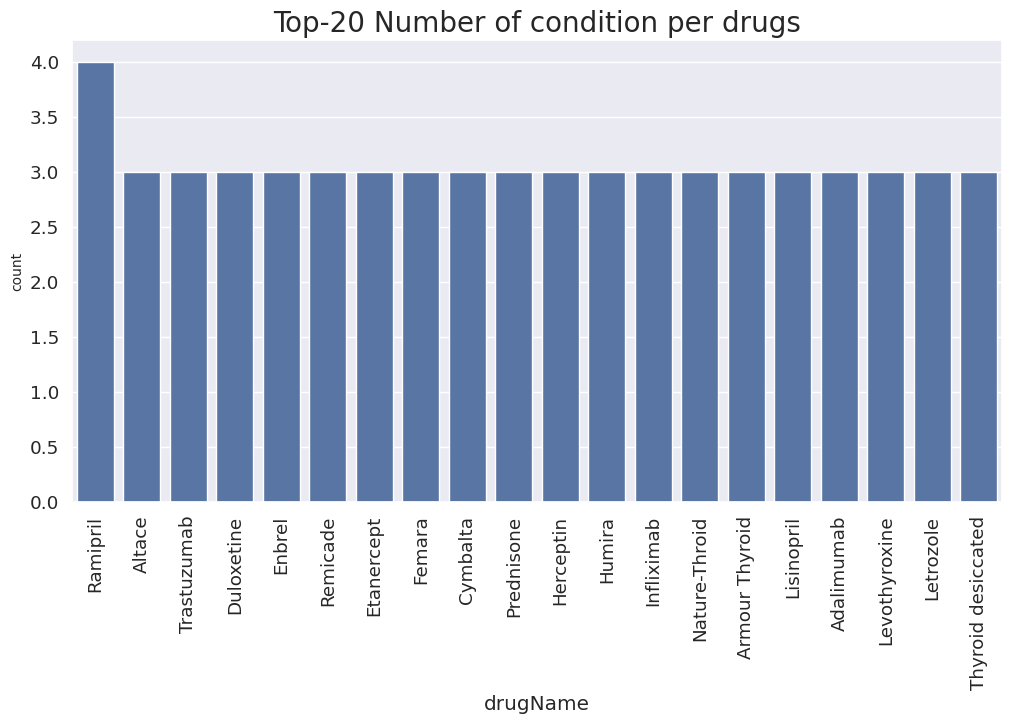

In [ ]:
#lets check the number of drugs present in our dataset condition wise
conditions_gp = DF.groupby('drugName')['condition'].nunique().sort_values(ascending=False)

#plot the top 20
# Setting the Parameter
condition_gp_top_20 = conditions_gp.head(20)
sns.set(font_scale = 1.2, style = 'darkgrid')
plt.rcParams['figure.figsize'] = [12, 6]
sns.barplot(x = condition_gp_top_20.index, y = condition_gp_top_20.values)
plt.title('Top-20 Number of condition per drugs',fontsize=20)
plt.xticks(rotation=90)
plt.ylabel('count',fontsize=10)
plt.show()

Word cloud for positive reviews

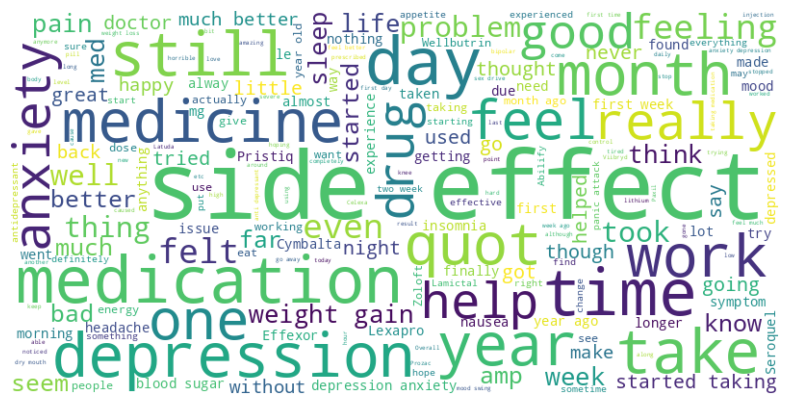

In [ ]:
text_data=" "
for index,row in DF.iterrows():
  if row['Sentiment']==1:
    text_data += str(row['review'])

#CREATING WORD CLOUD OBJECT
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_data)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Hide the axis
plt.show()

Word cloud for negative reviews

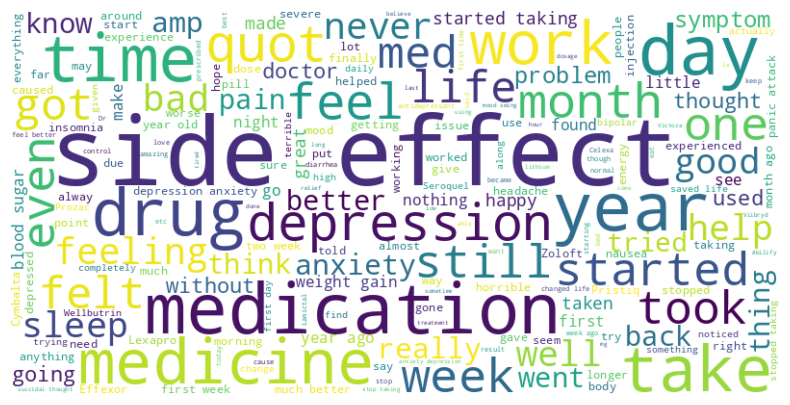

In [ ]:
text_data=" "
for index,row in DF.iterrows():
  if row['Sentiment']==0:
    text_data += str(row['review'])

#CREATING WORD CLOUD OBJECT
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_data)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Hide the axis
plt.show()

Model training and evaluation

KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
#Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(DF2['review'], DF2['Sentiment'], test_size=0.2, random_state=42)


In [ ]:
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

In [ ]:
#Create and train a KNN classifier
knn_classifier = KNeighborsClassifier(n_neighbors=5)  # You can adjust the number of neighbors (k)
knn_classifier.fit(X_train_tfidf, y_train)
# Make predictions on the test data
y_pred = knn_classifier.predict(X_test_tfidf)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.70      0.59      0.64      2879
           1       0.56      0.67      0.61      2254

    accuracy                           0.63      5133
   macro avg       0.63      0.63      0.63      5133
weighted avg       0.64      0.63      0.63      5133



Naive bayes

In [ ]:
from sklearn.naive_bayes import MultinomialNB
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(DF2['review'], DF2['Sentiment'], test_size=0.2, random_state=42)


In [ ]:
# Create a TfidfVectorizer to convert text data to TF-IDF features
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)



In [ ]:
# Create and train a Multinomial Naive Bayes classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train_tfidf, y_train)
# Make predictions on the test data
y_pred = nb_classifier.predict(X_test_tfidf)
# Evaluate the model
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.64      0.92      0.76      2879
           1       0.77      0.35      0.48      2254

    accuracy                           0.67      5133
   macro avg       0.71      0.64      0.62      5133
weighted avg       0.70      0.67      0.64      5133



Random forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(DF2['review'], DF2['Sentiment'], test_size=0.2, random_state=42)

# Create a TfidfVectorizer to convert text data to TF-IDF features
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)


In [ ]:
# Create and train a Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train_tfidf, y_train)

# Make predictions on the test data
y_pred = rf_classifier.predict(X_test_tfidf)

# Evaluate the model
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.94      0.89      2879
           1       0.92      0.79      0.85      2254

    accuracy                           0.87      5133
   macro avg       0.88      0.87      0.87      5133
weighted avg       0.88      0.87      0.87      5133



SVM with different kernel functions

In [ ]:
from sklearn.svm import SVC
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(DF2['review'], DF2['Sentiment'], test_size=0.2, random_state=42)


In [ ]:
# Create a TfidfVectorizer to convert text data to TF-IDF features
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

Linear kernel function

In [ ]:
# Create and train SVM classifiers with different kernels
svm_linear = SVC(kernel='linear', C=1.0)
# Train the SVM classifiers
svm_linear.fit(X_train_tfidf, y_train)
# Make predictions on the test data for each model
y_pred_linear = svm_linear.predict(X_test_tfidf)
# Evaluate each model
print("Linear Kernel SVM:")
print(classification_report(y_test, y_pred_linear))

Linear Kernel SVM:
              precision    recall  f1-score   support

           0       0.73      0.81      0.77      2879
           1       0.71      0.61      0.66      2254

    accuracy                           0.72      5133
   macro avg       0.72      0.71      0.71      5133
weighted avg       0.72      0.72      0.72      5133



Polynomial kernel function

In [ ]:
# Create and train SVM classifiers with different kernels
svm_poly = SVC(kernel='poly', degree=3, C=1.0)
# Train the SVM classifiers
svm_poly.fit(X_train_tfidf, y_train)
# Make predictions on the test data for each model
y_pred_poly = svm_poly.predict(X_test_tfidf)
# Evaluate each model
print("Polynomial Kernel SVM:")
print(classification_report(y_test, y_pred_poly))

Polynomial Kernel SVM:
              precision    recall  f1-score   support

           0       0.82      0.97      0.89      2879
           1       0.95      0.73      0.83      2254

    accuracy                           0.86      5133
   macro avg       0.89      0.85      0.86      5133
weighted avg       0.88      0.86      0.86      5133



RBF kernel function

In [ ]:
# Create and train SVM classifiers with different kernels
svm_rbf = SVC(kernel='rbf', C=1.0)
# Train the SVM classifiers
svm_rbf.fit(X_train_tfidf, y_train)
# Make predictions on the test data for each model
y_pred_rbf = svm_rbf.predict(X_test_tfidf)
# Evaluate each model
print("RBF Kernel SVM:")
print(classification_report(y_test, y_pred_rbf))

RBF Kernel SVM:
              precision    recall  f1-score   support

           0       0.84      0.90      0.87      2879
           1       0.86      0.79      0.82      2254

    accuracy                           0.85      5133
   macro avg       0.85      0.84      0.85      5133
weighted avg       0.85      0.85      0.85      5133



Logistic regression

In [ ]:
from sklearn.linear_model import LogisticRegression
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(DF2['review'], DF2['Sentiment'], test_size=0.2, random_state=42)



In [ ]:
# Create a TfidfVectorizer to convert text data to TF-IDF features
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)


In [ ]:
# Create and train a Logistic Regression classifier
logistic_regression = LogisticRegression(max_iter=1000)  # You can adjust hyperparameters as needed
logistic_regression.fit(X_train_tfidf, y_train)
# Make predictions on the test data
y_pred = logistic_regression.predict(X_test_tfidf)
# Evaluate the model
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.70      0.81      0.76      2879
           1       0.70      0.57      0.63      2254

    accuracy                           0.70      5133
   macro avg       0.70      0.69      0.69      5133
weighted avg       0.70      0.70      0.70      5133



Explainable AI - LIME and SHAP

In [ ]:
!pip install lime shap


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 5.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=304f72fb1cff7e54beb498cb94104f0fd625a5a80ef5c428d8abfba2b7f5ac75
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime


In [ ]:
import lime
import lime.lime_text
from lime.lime_text import LimeTextExplainer
import shap
from sklearn.pipeline import make_pipeline

LIME for KNN

In [ ]:
# Create a LIME Explainer
explainer = lime.lime_text.LimeTextExplainer(class_names=['class_label_0', 'class_label_1'])

# Select a random test instance (you can choose any instance)
test_instance = X_test.iloc[0]

# Create a pipeline with your KNN classifier and TF-IDF vectorizer
pipeline = make_pipeline(tfidf_vectorizer, knn_classifier)

# Explain the model's prediction for the selected instance
explanation = explainer.explain_instance(test_instance, pipeline.predict_proba)

# Visualize the explanation
explanation.show_in_notebook()

LIME for Naive bayes

In [ ]:
# Create a LIME Explainer
explainer = lime.lime_text.LimeTextExplainer(class_names=['class_label_0', 'class_label_1'])

# Select a random test instance (you can choose any instance)
test_instance = X_test.iloc[0]

# Create a pipeline with your Naive Bayes classifier and TF-IDF vectorizer
pipeline = make_pipeline(tfidf_vectorizer, nb_classifier)

# Explain the model's prediction for the selected instance
explanation = explainer.explain_instance(test_instance, pipeline.predict_proba)

# Visualize the explanation
explanation.show_in_notebook()

LIME for logistic regression

In [ ]:
# Create a LIME Explainer
explainer = lime.lime_text.LimeTextExplainer(class_names=['class_label_0', 'class_label_1'])
# Select a random test instance
test_instance = X_test.iloc[0]
# Create a pipeline with your logistic regression model and TF-IDF vectorizer
pipeline = make_pipeline(tfidf_vectorizer, logistic_regression)
# Explain the model's prediction for the selected instance
explanation = explainer.explain_instance(test_instance, pipeline.predict_proba)

# Visualize the explanation
explanation.show_in_notebook()


SHAP for logistic regression

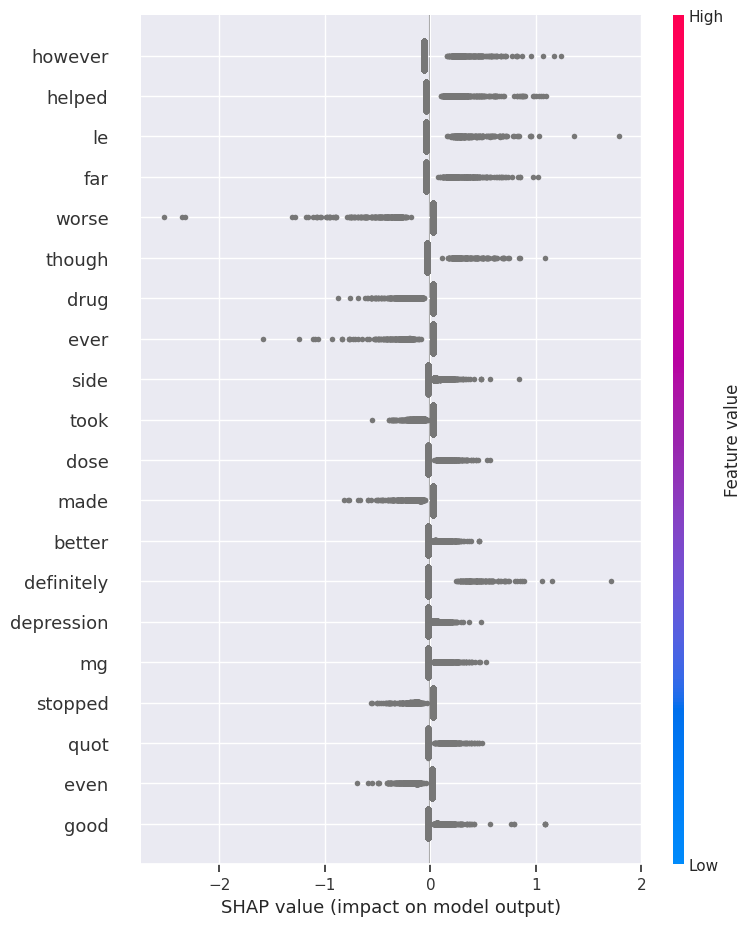

In [ ]:
# Create a SHAP explainer for the logistic regression model
explainer = shap.Explainer(logistic_regression, X_train_tfidf)
# Calculate SHAP values for the test dataset
shap_values = explainer.shap_values(X_test_tfidf)

# Summary plot for feature importance
shap.summary_plot(shap_values, X_test_tfidf, feature_names=tfidf_vectorizer.get_feature_names_out())


UI interface

In [ ]:
!pip install -q streamlit


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.9/41.9 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 28.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 23.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.3/79.3 kB 3.3 MB/s eta 0:00:00


In [ ]:
!npm install localtunnel



added 22 packages, and audited 23 packages in 2s

3 packages are looking for funding
  run `npm fund` for details

2 moderate severity vulnerabilities

To address all issues, run:
  npm audit fix

Run `npm audit` for details.


In [ ]:
%%writefile app.py

## IMPORTING THE LIBRARIES
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
from wordcloud import WordCloud
from wordcloud import STOPWORDS

# IMPORTING THE NLTK PACKAGE
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.sentiment import SentimentIntensityAnalyzer

# DOWNLOADING THE NLTK RESOURCES
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('vader_lexicon')

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
#from sklearn.svm import SVC

# Import the Streamlit library
import streamlit as st

# READ THE CSV FILE
DF2 = pd.read_csv('/content/Preprocessed_DataFrame.csv')

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(DF2['review'], DF2['Sentiment'], test_size=0.2, random_state=42)

# Create a TfidfVectorizer to convert text data to TF-IDF features
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Create classifiers
knn_classifier = KNeighborsClassifier(n_neighbors=5)
logistic_regression = LogisticRegression(max_iter=1000)
naive_bayes = MultinomialNB()
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)
#svm_linear = SVC(kernel='linear', probability=True)
#svm_poly = SVC(kernel='poly', degree=3, probability=True)
#svm_rbf = SVC(kernel='rbf', probability=True)

# Train classifiers
knn_classifier.fit(X_train_tfidf, y_train)
logistic_regression.fit(X_train_tfidf, y_train)
naive_bayes.fit(X_train_tfidf, y_train)
random_forest.fit(X_train_tfidf, y_train)
#svm_linear.fit(X_train_tfidf, y_train)
#svm_poly.fit(X_train_tfidf, y_train)
#svm_rbf.fit(X_train_tfidf, y_train)

# Set the heading
st.markdown("# DRUG REVIEW SENTIMENT ANALYSIS")

# Add a dropdown menu to select the classification model
model_choice = st.selectbox("Choose the Classification Model", ["KNN", "Naive Bayes", "Logistic Regression", "Random Forest"])

# Perform prediction based on the selected model when the user clicks the button
if st.button("Predict Sentiment and Show Report"):
    st.markdown(f"PREDICTED SENTIMENT USING {model_choice.upper()}")

    # Perform prediction based on the selected model
    if model_choice == "Logistic Regression":
        y_pred = logistic_regression.predict(X_test_tfidf)
    elif model_choice == "KNN":
        y_pred = knn_classifier.predict(X_test_tfidf)
    elif model_choice == "Naive Bayes":
        y_pred = naive_bayes.predict(X_test_tfidf)
    elif model_choice == "Random Forest":
        y_pred = random_forest.predict(X_test_tfidf)
    #elif model_choice == "SVM Linear":
    #    y_pred = svm_linear.predict(X_test_tfidf)
    #elif model_choice == "SVM Polynomial":
    #   y_pred = svm_poly.predict(X_test_tfidf)
    #elif model_choice == "SVM RBF":
    #    y_pred = svm_rbf.predict(X_test_tfidf)

    # Display the classification report
    st.markdown("### Classification Report")
    report = classification_report(y_test, y_pred, output_dict=True)
    report_df = pd.DataFrame(report).transpose()
    st.write(report_df)

    # Confusion Matrix
    st.markdown("### Confusion Matrix")
    cm = confusion_matrix(y_test, y_pred)
    fig, ax = plt.subplots(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=set(y_test), yticklabels=set(y_test))
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix for {model_choice}')
    st.pyplot(fig)


Writing app.py


In [ ]:
!streamlit run /content/app.py &>/content/logs.txt & curl ipv4.icanhazip.com


34.80.27.33


In [ ]:

!npx localtunnel --port 8501


your url is: https://ripe-plants-carry.loca.lt
^C


In [ ]:
%%writefile app.py

## IMPORTING THE LIBRARIES
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
from wordcloud import WordCloud
from wordcloud import STOPWORDS

# IMPORTING THE NLTK PACKAGE
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.sentiment import SentimentIntensityAnalyzer

# DOWNLOADING THE NLTK RESOURCES
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('vader_lexicon')

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.svm import SVC

# Import the Streamlit library
import streamlit as st

# READ THE CSV FILE
DF2 = pd.read_csv('/content/Preprocessed_DataFrame.csv')

# Sample 2,000 data points
sampled_data = DF2.sample(n=2000, random_state=42).reset_index(drop=True)

# Split the sampled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(sampled_data['review'], sampled_data['Sentiment'], test_size=0.2, random_state=42)

# Create a TfidfVectorizer to convert text data to TF-IDF features
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Create classifiers
svm_linear = SVC(kernel='linear', probability=True)
svm_poly = SVC(kernel='poly', degree=3, probability=True)
svm_rbf = SVC(kernel='rbf', probability=True)

# Train classifiers
svm_linear.fit(X_train_tfidf, y_train)
svm_poly.fit(X_train_tfidf, y_train)
svm_rbf.fit(X_train_tfidf, y_train)

# Set the heading
st.markdown("# DRUG REVIEW SENTIMENT ANALYSIS")

# Add a dropdown menu to select the classification model
model_choice = st.selectbox("Choose the Classification Model", ["SVM Linear", "SVM Polynomial", "SVM RBF"])

# Perform prediction based on the selected model when the user clicks the button
if st.button("Predict Sentiment and Show Report"):
    st.markdown(f"PREDICTED SENTIMENT USING {model_choice.upper()}")

    # Perform prediction based on the selected model
    if model_choice == "SVM Linear":
        y_pred = svm_linear.predict(X_test_tfidf)
    elif model_choice == "SVM Polynomial":
        y_pred = svm_poly.predict(X_test_tfidf)
    elif model_choice == "SVM RBF":
        y_pred = svm_rbf.predict(X_test_tfidf)

    # Display the classification report
    st.markdown("### Classification Report")
    report = classification_report(y_test, y_pred, output_dict=True)
    report_df = pd.DataFrame(report).transpose()
    st.write(report_df)

    # Confusion Matrix
    st.markdown("### Confusion Matrix")
    cm = confusion_matrix(y_test, y_pred)
    fig, ax = plt.subplots(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=set(y_test), yticklabels=set(y_test))
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix for {model_choice}')
    st.pyplot(fig)


Overwriting app.py


In [ ]:
!pip install transformers torch pandas scikit-learn matplotlib seaborn


LLM model
Fine-tune a pre-trained BERT model with 2000 samples

In [ ]:
import pandas as pd
import torch
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from transformers import BertTokenizer, BertForSequenceClassification, Trainer, TrainingArguments
from transformers import pipeline

# Load the CSV file
file_path = '/content/Preprocessed_DataFrame.csv'  # Update with the actual file path
data = pd.read_csv(file_path)

# Sample 2,000 data points
sampled_data = data.sample(n=2000, random_state=42).reset_index(drop=True)

# Preprocess the reviews: convert to lowercase and remove special characters
sampled_data['review'] = sampled_data['review'].str.lower().str.replace('[^a-zA-Z ]', '', regex=True)

# Split the data into training and test sets (80% training, 20% testing)
train_texts, test_texts, train_labels, test_labels = train_test_split(
    sampled_data['review'], sampled_data['Sentiment'], test_size=0.2, random_state=42
)

# Load a pre-trained BERT tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Tokenize the text data
train_encodings = tokenizer(list(train_texts), truncation=True, padding=True, max_length=128)
test_encodings = tokenizer(list(test_texts), truncation=True, padding=True, max_length=128)

# Convert the data into PyTorch datasets
class DrugReviewDataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item

    def __len__(self):
        return len(self.labels)

train_dataset = DrugReviewDataset(train_encodings, train_labels.tolist())
test_dataset = DrugReviewDataset(test_encodings, test_labels.tolist())

# Load a pre-trained BERT model for sequence classification
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=2)

# Set up training arguments
training_args = TrainingArguments(
    output_dir='./results',
    num_train_epochs=3,
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    warmup_steps=500,
    weight_decay=0.01,
    logging_dir='./logs',
    logging_steps=10,
    evaluation_strategy="epoch"
)

# Define a Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset
)

# Train the model
trainer.train()

# Evaluate the model
predictions = trainer.predict(test_dataset)
preds = predictions.predictions.argmax(-1)

# Calculate accuracy
accuracy = accuracy_score(test_labels, preds)
print(f'Accuracy: {accuracy:.2f}')

# Display a classification report
print(classification_report(test_labels, preds, target_names=['Negative', 'Positive']))

# Optionally, use the model for prediction with a pipeline
sentiment_pipeline = pipeline("sentiment-analysis", model=model, tokenizer=tokenizer)
example_review = "This medication really helped me with my pain!"
result = sentiment_pipeline(example_review)
print(result)


/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1525: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


Accuracy: 0.65
              precision    recall  f1-score   support

    Negative       0.68      0.72      0.70       228
    Positive       0.59      0.55      0.57       172

    accuracy                           0.65       400
   macro avg       0.64      0.63      0.63       400
weighted avg       0.64      0.65      0.64       400

[{'label': 'LABEL_0', 'score': 0.7853410840034485}]
